## `Machine Learning`

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
# Import the preprocessed data
data = pd.read_csv("features.csv", index_col=0)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,blood_pressure,age_blood_press,age_chol,age_smoking,bmi_glu
id,,,,,,,,,,,,,,,,,,
0,50,0,168,62.0,110,80,1,1,0,0,1,0,22.0,8800,440000,50,0,22.0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.9,12600,693000,165,0,34.9
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.5,9100,464100,153,0,23.5
3,48,0,169,82.0,150,100,1,1,0,0,1,1,28.7,15000,720000,48,0,28.7
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.0,6000,282000,47,0,23.0


In [3]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68506 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              68506 non-null  int64  
 1   gender           68506 non-null  int64  
 2   height           68506 non-null  int64  
 3   weight           68506 non-null  float64
 4   ap_hi            68506 non-null  int64  
 5   ap_lo            68506 non-null  int64  
 6   cholesterol      68506 non-null  int64  
 7   gluc             68506 non-null  int64  
 8   smoke            68506 non-null  int64  
 9   alco             68506 non-null  int64  
 10  active           68506 non-null  int64  
 11  cardio           68506 non-null  int64  
 12  bmi              68506 non-null  float64
 13  blood_pressure   68506 non-null  int64  
 14  age_blood_press  68506 non-null  int64  
 15  age_chol         68506 non-null  int64  
 16  age_smoking      68506 non-null  int64  
 17  bmi_glu          

In [4]:
X = data.drop(columns=['cardio']) # Predictor variables
y = data['cardio'] # Target variable


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.20,
                                                    random_state=123)

print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (54804, 17)
y_train Shape:  (54804,)
X_test Shape:  (13702, 17)
y_test Shape:  (13702,)


In [5]:
# Feature Standadization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### `Baseline Model`

In [ ]:
def model_select(classifier):    
    model = classifier.fit(X_train_scaled, y_train)

    # Predictions
    train_preds = model.predict(X_train_scaled)

    # Evaluation metrics
    metrics = {
        "Accuracy": accuracy_score(y_train, train_preds),
        "Precision": precision_score(y_train, train_preds),
        "Recall": recall_score(y_train, train_preds),
        "F1 Score": f1_score(y_train, train_preds)
    }

    # Print metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_train, train_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')

    plt.show()


Accuracy: 0.7309
Precision: 0.7410
Recall: 0.7000
F1 Score: 0.7199


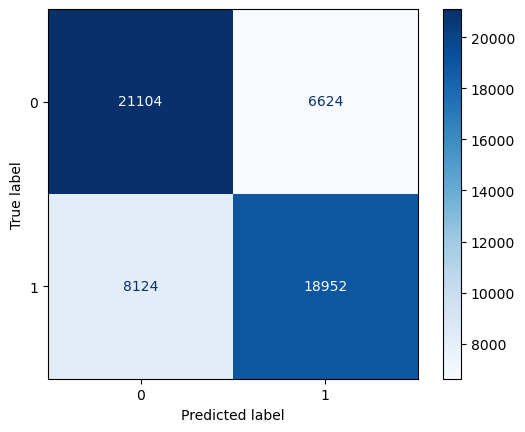

In [14]:
# LogisticRegression model
model_select(LogisticRegression())

#### `DecisionTreeClassifier`

Accuracy: 0.9797
Precision: 0.9947
Recall: 0.9640
F1 Score: 0.9791


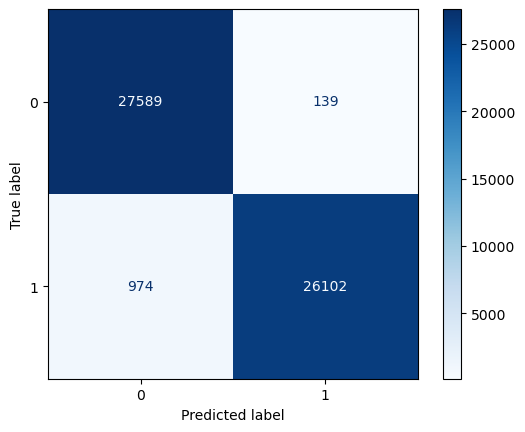

In [17]:
model_select(DecisionTreeClassifier())

#### `RandomForestClassifier`

Accuracy: 0.9797
Precision: 0.9851
Recall: 0.9736
F1 Score: 0.9793


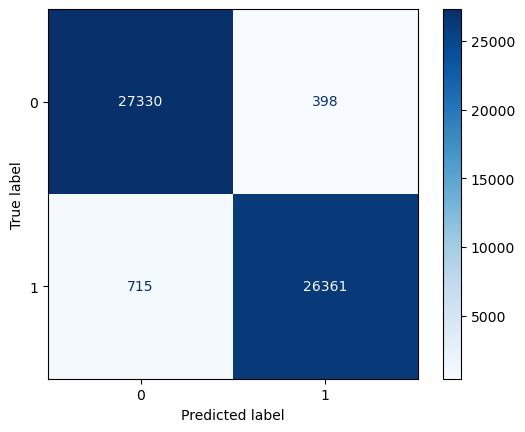

In [18]:
model_select(RandomForestClassifier())

#### `GradientBoostingClassifier`

Accuracy: 0.7377
Precision: 0.7548
Recall: 0.6948
F1 Score: 0.7235


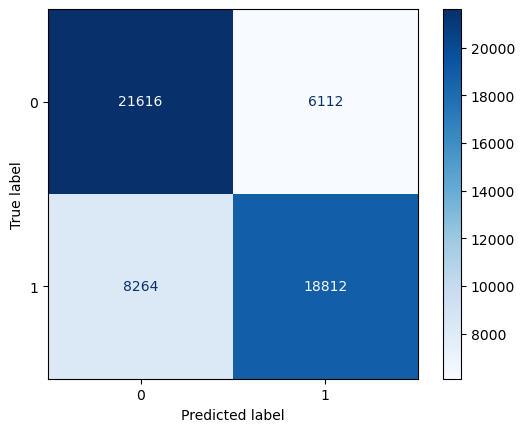

In [20]:
model_select(GradientBoostingClassifier())

#### `XGBClassifier`

Accuracy: 0.7686
Precision: 0.7882
Recall: 0.7270
F1 Score: 0.7564


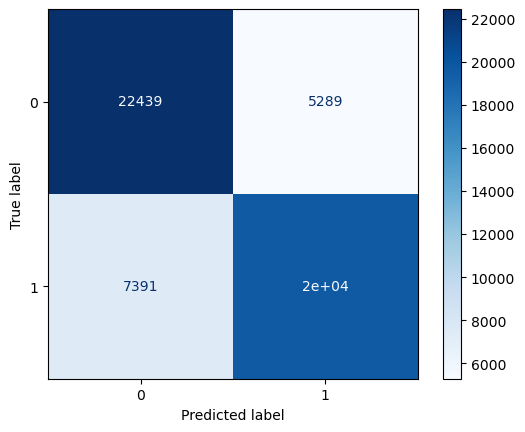

In [22]:
model_select(XGBClassifier())

### `Model Selection and Fine Tuning`
#### `Model Validation: Decision Tree and Random Forest Models`

In [23]:
# Standardized test set
X_test_scaled = scaler.transform(X_test)

In [ ]:
def model_test(classifier):
    model = classifier.fit(X_train_scaled, y_train)
    
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)

    # Model Parameters
    print("Model parameters: ")
    print(model.get_params())

    test_metrics = {
            "Train Accuracy": accuracy_score(y_train, train_predictions),
            "Test Accuracy": accuracy_score(y_test, test_predictions),
            "Train Precision": precision_score(y_train, train_predictions),
            "Test Precision": precision_score(y_test, test_predictions),
            "Train Recall": recall_score(y_train, train_predictions),
            "Test Recall": recall_score(y_test, test_predictions),
            "Train F1 Score": f1_score(y_train, train_predictions),
            "Test F1 Score": f1_score(y_test, test_predictions)
        }

    # Print metrics
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_train, train_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')

    plt.show()

    # Feature importance
    model_feat_imp = model.feature_importances_
    print("Model feature importances: ")
    print(model_feat_imp)

    features = X_train.columns
    fig, ax = plt.subplots(figsize=(8,4))
    sns.barplot(x=model_feat_imp, y=features)
    ax.set_title("Model Feature Importances")
    ax.set_xlabel("Feature Importances")
    ax.set_ylabel("Features")

    plt.show()   
    

Model parameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Train Accuracy: 0.9797
Test Accuracy: 0.6365
Train Precision: 0.9947
Test Precision: 0.6369
Train Recall: 0.9640
Test Recall: 0.6276
Train F1 Score: 0.9791
Test F1 Score: 0.6322


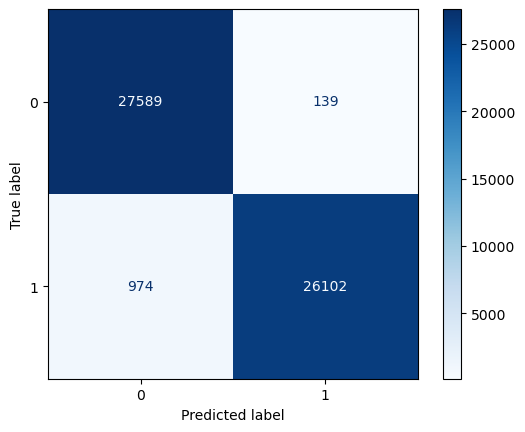

Model feature importances: 
[0.05042545 0.02351184 0.11404986 0.11407841 0.22878705 0.01108584
 0.00325355 0.00391367 0.00618586 0.00756229 0.01438001 0.10977598
 0.01848365 0.07869108 0.09440587 0.01167975 0.10972985]


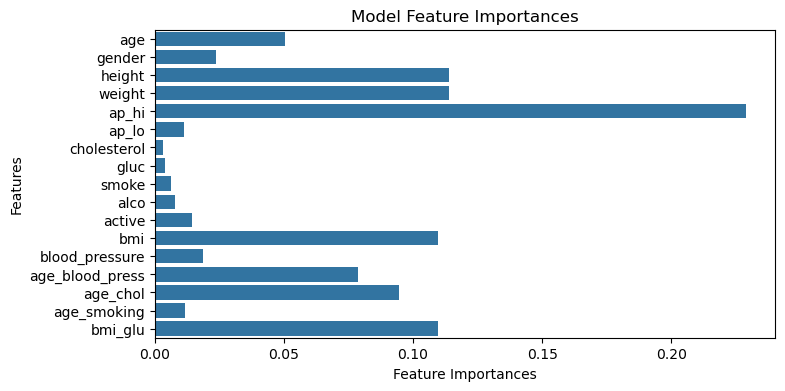

In [75]:
# Without adjusting parameters
model_test(DecisionTreeClassifier())

##### `The model is heavily overfitting. We need to control the structure of the tree.`

Model parameters: 
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 20, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 23, 'splitter': 'best'}
Train Accuracy: 0.7300
Test Accuracy: 0.7265
Train Precision: 0.7561
Test Precision: 0.7538
Train Recall: 0.6694
Test Recall: 0.6693
Train F1 Score: 0.7101
Test F1 Score: 0.7090


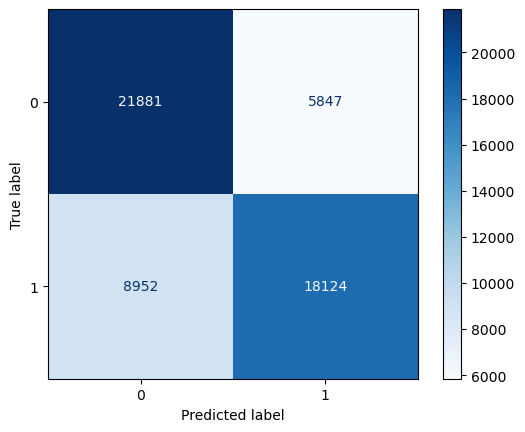

Model feature importances: 
[1.47572630e-02 5.93203302e-04 0.00000000e+00 3.04946405e-03
 7.69217383e-01 0.00000000e+00 1.25370933e-03 2.53584043e-03
 0.00000000e+00 4.79280166e-04 1.64895304e-03 6.84563998e-03
 1.60936857e-03 2.66251787e-02 1.68403184e-01 0.00000000e+00
 2.98153262e-03]


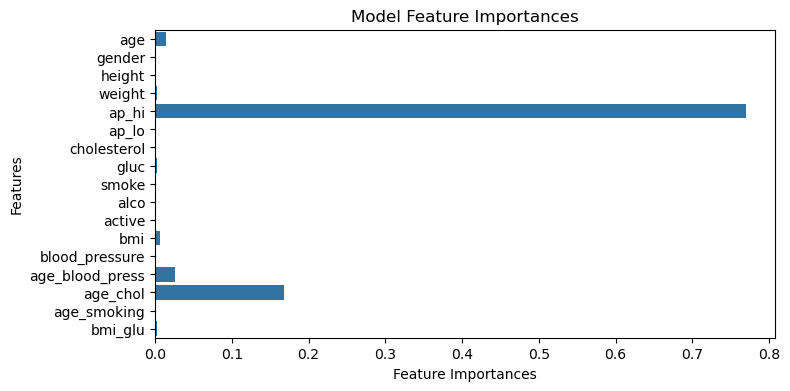

In [77]:
# With sample adjusted parameters 
model_test(DecisionTreeClassifier(max_depth=5,
                                       min_samples_leaf=20,
                                       min_samples_split=50,
                                       random_state=23)) # Adjusted parameters

Model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train Accuracy: 0.9797
Test Accuracy: 0.7041
Train Precision: 0.9859
Test Precision: 0.7059
Train Recall: 0.9728
Test Recall: 0.6952
Train F1 Score: 0.9793
Test F1 Score: 0.7005


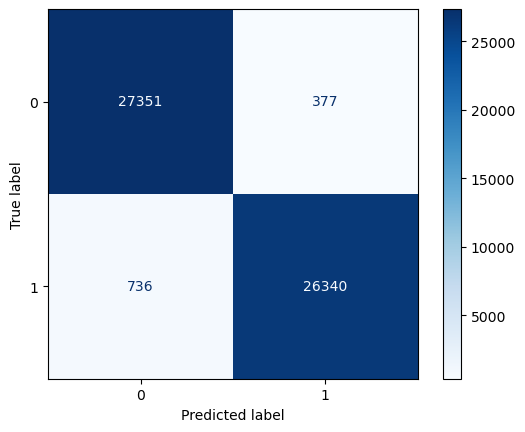

Model feature importances: 
[0.05704813 0.02139303 0.10817561 0.11030317 0.09878021 0.03853502
 0.02066659 0.00845051 0.0053849  0.00717382 0.01711181 0.1154804
 0.07476197 0.11451755 0.07246986 0.0104071  0.11934031]


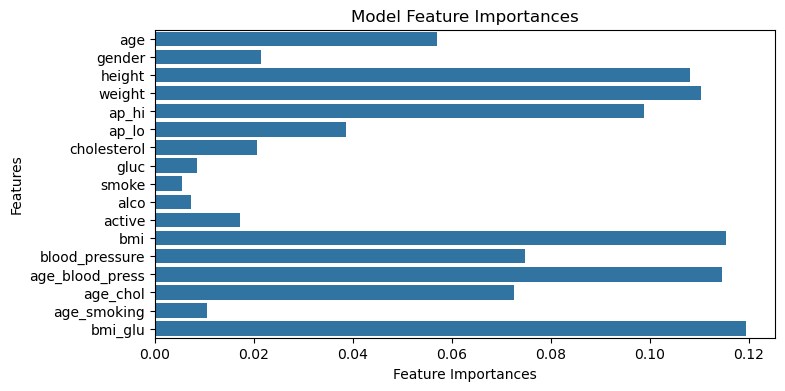

In [52]:
# Random Forest
model_test(RandomForestClassifier())

##### `Random Forest model better. We select this model and fine tune it to handle overfitting.`

##### `Random Forest Grid Search`

In [ ]:
# Parameters
grid_params = {
    'n_estimators': 200,
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'class_weight': 'balanced',
    'n_jobs': -1
}

In [61]:
# Random Search
param_dist = {
    "n_estimators": [500],
    "max_depth": [15, 17],
    "min_samples_split": [200],
    "min_samples_leaf": [3],
    "max_features": ["log2"],
    "class_weight": ["balanced"],

}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=24),
    param_distributions=param_dist,
    n_iter=30,                # number of combinations to try
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_train_scaled, y_train)
random_search.best_params_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=30. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'n_estimators': 500,
 'min_samples_split': 200,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 17,
 'class_weight': 'balanced'}

Model parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Train Accuracy: 0.7361
Test Accuracy: 0.7327
Train Precision: 0.7572
Test Precision: 0.7559
Train Recall: 0.6857
Test Recall: 0.6841
Train F1 Score: 0.7197
Test F1 Score: 0.7182


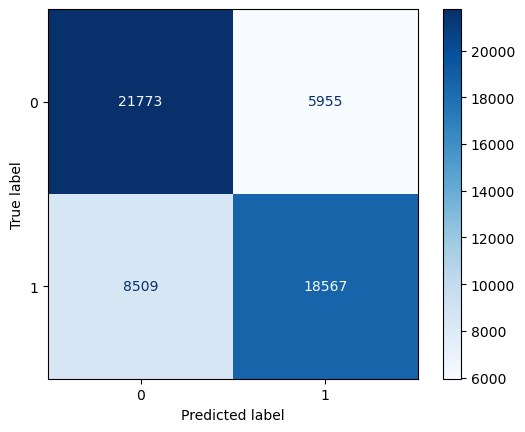

Model feature importances: 
[0.0449715  0.0004505  0.00222616 0.00917184 0.26132212 0.09068721
 0.03981879 0.00253648 0.00055145 0.00038835 0.00195234 0.01163187
 0.21350008 0.21160383 0.09303424 0.00114665 0.01500659]


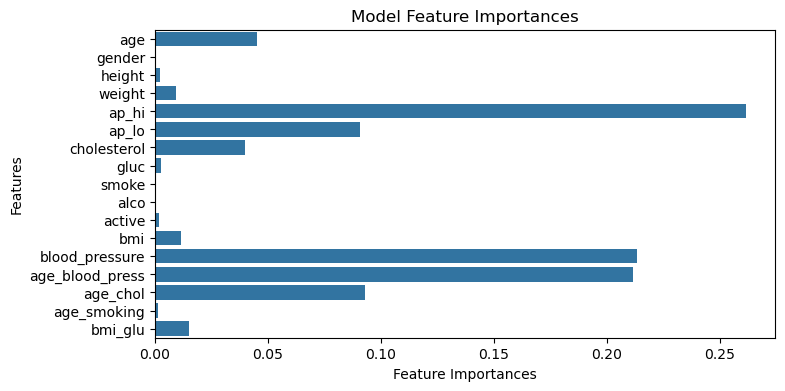

In [ ]:
# Test model with adjusted best params from the random search
model_test(RandomForestClassifier(n_estimators=500,
                                  max_depth=6,
                                  class_weight='balanced'
                                  ))

In [86]:
# Final model
final_model = RandomForestClassifier(n_estimators=500,
                                  max_depth=6,
                                  class_weight='balanced'
                                  )

In [88]:
# Save model
with open("cvd_rf_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [89]:
# Save the scaler
with open("std_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)